In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Read and Setup Data for Modeling

In [2]:
# Navigate up one level from the current directory
parent_dir = os.path.dirname(os.getcwd())

# Define the relative path to the Parquet file from the parent directory
relative_path = r"df_small_encoded.parquet"

# Concatenate the parent directory path and the relative path to get the full path
full_path = os.path.join(parent_dir, relative_path)


In [3]:
class Data():
    
    def dataAllocation(self,path, state):
        """Separate out the x_data and y_data and return each

        Args:
            path (_type_): string path for .parquet file

        Returns:
            _type_: pandas dataframe, pandas series
        """
        df = pd.read_parquet(path)
        # # Filter columns that start with 'state_code'
        # state_code_columns = df.filter(regex='^state_code', axis=1)
        #ref state
        df = df.drop(['derived_sex_Male','race_ethnicity_White', 'applicant_age_25-34', 'occupancy_type_Principal Residence'], axis=1)

        # bring data with state code 
        # filter by state_code of interst
        # then get dummies for that state
        # Drop filtered columns

        # 'derived_sex_Male', 'race_ethnicity_White, 'applicant_age_25-34', occupancy_type_Principal Residence
        df = df[df['state_code'] == state]
        df = pd.get_dummies(df, columns=['county_code'], drop_first=True)

        

        x_data = df.drop(['application_approved', 'state_code'], axis=1)

        y_data = df['application_approved']
               
        return x_data,y_data

    def trainSets(self,x_data,y_data):
        
        """Split 70% of the data into training and 30% into test sets. Call them x_train, x_test, y_train and y_test

        Args:
            x_data (_type_): pandas dataframe
            y_data (_type_): pandas dataframe

        Returns:
            _type_: pandas dataframe, pandas dataframe, pandas series, pandas series
        """
        from sklearn.model_selection import train_test_split

        # Split data
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=614, shuffle=True)
        #fill any nan values in y with 0
        y_train = y_train.fillna(0)

        #any nan values in X_train fill with 0
        x_train = x_train.fillna(0)

        #any nan values in X_train fill with 0
        y_test = y_test.fillna(0)

        #any nan values in X_test fill with 0
        x_test = x_test.fillna(0)


        return x_train, x_test, y_train, y_test


In [4]:
# set up data read data

datatest = Data()

# seperate target variable and features 

x_data,y_data = datatest.dataAllocation(full_path, 'NY')

# split to train and testing
x_train, x_test, y_train, y_test = datatest.trainSets(x_data,y_data)


In [5]:
len(x_train.columns)

86

# Modeling

## 1. Linear Regression

In [56]:
class LinearRegressionModel():
    
  
    def linearClassifier(self,x_train, x_test, y_train):
        """LinearRegression classifier

        Args:
            x_train (_type_): pandas series
            x_test (_type_): pandas series
            y_train (_type_): pandas series

        Returns:
            _type_: numpy array, numpy array
        """
        from sklearn.linear_model import LinearRegression

        model_lr = LinearRegression()

        model_lr.fit(x_train, y_train)

        # Make predictions
        y_predict_train = model_lr.predict(x_train)
        y_predict_test = model_lr.predict(x_test)

        # -------------------------------
        return y_predict_train, y_predict_test

    def lgTrainAccuracy(self,y_train,y_predict_train):
        """accuracy (on the training set) using the accuracy_score method.
            Round the output values greater than or equal to 0.5 to 1 and those less than 0.5 to 0. You can use any method that satisfies the requriements

        Args:
            y_train (_type_): pandas series
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        # Convert regression predictions to binary classification labels
        y_train_pred_class = [1 if y >= 0.5 else 0 for y in y_predict_train]

        # Calculate accuracy (not a standard approach for regression)
        train_accuracy = accuracy_score(y_train, y_train_pred_class)
       
 
        return train_accuracy
    

    def lgTestAccuracy(self,y_test,y_predict_test):
        """accuracy (on the testing set) using the accuracy_score method
            Round the output values greater than or equal to 0.5 to 1 and those less than 0.5 to 0. You can use any method that satisfies the requriements

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        # Convert regression predictions to binary classification labels
        y_test_pred_class = [1 if y >= 0.5 else 0 for y in y_predict_test]

        # Calculate accuracy (not a standard approach for regression)
        test_accuracy = accuracy_score(y_test, y_test_pred_class)
             
        return test_accuracy
    
    def lgTestReport(self,y_test,y_predict_test):
        """Report classification

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import classification_report

        # Convert regression predictions to binary classification labels
        y_test_pred_class = [1 if y >= 0.5 else 0 for y in y_predict_test]

        # Calculate accuracy (not a standard approach for regression)
       
        class_report = classification_report(y_test, y_test_pred_class, zero_division='warn')
       
        return class_report

In [57]:
linear = LinearRegressionModel()
y_predict_train, y_predict_test = linear.linearClassifier(x_train,x_test, y_train)
print("linearClassifier Function Executed")
print("Linear Regression Train Accuracy: ", linear.lgTrainAccuracy(y_train,y_predict_train))
print("Linear Regression Test Accuracy: ", linear.lgTestAccuracy(y_test,y_predict_test))
print("Linear Regression Test Report: \n", linear.lgTestReport(y_test,y_predict_test))

linearClassifier Function Executed
Linear Regression Train Accuracy:  0.9182396499871428
Linear Regression Test Accuracy:  0.9173260869565217
Linear Regression Test Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     19015
           1       0.92      1.00      0.96    210985

    accuracy                           0.92    230000
   macro avg       0.46      0.50      0.48    230000
weighted avg       0.84      0.92      0.88    230000



c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [8]:
datatest = Data()

# seperate target variable and features 

x_data,y_data = datatest.dataAllocation(full_path, 'WA')

# split to train and testing
x_train, x_test, y_train, y_test = datatest.trainSets(x_data,y_data)

linear = LinearRegressionModel()
y_predict_train, y_predict_test = linear.linearClassifier(x_train,x_test, y_train)
print("linearClassifier Function Executed")
print("Linear Regression Train Accuracy: ", linear.lgTrainAccuracy(y_train,y_predict_train))
print("Linear Regression Test Accuracy: ", linear.lgTestAccuracy(y_test,y_predict_test))
print("Linear Regression Test Report: \n", linear.lgTestReport(y_test,y_predict_test))

linearClassifier Function Executed
Linear Regression Train Accuracy:  0.9447785712656004
Linear Regression Test Accuracy:  0.9448730029440106
Linear Regression Test Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     10355
           1       0.94      1.00      0.97    177484

    accuracy                           0.94    187839
   macro avg       0.47      0.50      0.49    187839
weighted avg       0.89      0.94      0.92    187839



c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [9]:
datatest = Data()

# seperate target variable and features 

x_data,y_data = datatest.dataAllocation(full_path, 'TX')

# split to train and testing
x_train, x_test, y_train, y_test = datatest.trainSets(x_data,y_data)

linear = LinearRegressionModel()
y_predict_train, y_predict_test = linear.linearClassifier(x_train,x_test, y_train)
print("linearClassifier Function Executed")
print("Linear Regression Train Accuracy: ", linear.lgTrainAccuracy(y_train,y_predict_train))
print("Linear Regression Test Accuracy: ", linear.lgTestAccuracy(y_test,y_predict_test))
print("Linear Regression Test Report: \n", linear.lgTestReport(y_test,y_predict_test))

linearClassifier Function Executed
Linear Regression Train Accuracy:  0.9218868695847631
Linear Regression Test Accuracy:  0.9220803147453689


c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Linear Regression Test Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     52444
           1       0.92      1.00      0.96    620608

    accuracy                           0.92    673052
   macro avg       0.46      0.50      0.48    673052
weighted avg       0.85      0.92      0.88    673052



c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 2. Logistic Regression

In [19]:
class LogsticRegressionModel():
    
  
    def logisticClassifier(self,x_train, x_test, y_train):
        """Logistic Regression classifier

        Args:
            x_train (_type_): pandas series
            x_test (_type_): pandas series
            y_train (_type_): pandas series

        Returns:
            _type_: numpy array, numpy array
        """
        from sklearn.linear_model import LogisticRegression

        model_lgr = LogisticRegression(max_iter= 1000)

        model_lgr.fit(x_train, y_train)

        # Make predictions
        y_predict_train = model_lgr.predict(x_train)
        y_predict_test = model_lgr.predict(x_test)

        # -------------------------------
        return model_lgr, y_predict_train, y_predict_test

    def lgTrainAccuracy(self,y_train,y_predict_train):
        """accuracy (on the training set) using the accuracy_score method.
            Round the output values greater than or equal to 0.5 to 1 and those less than 0.5 to 0. You can use any method that satisfies the requriements

        Args:
            y_train (_type_): pandas series
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score

        # Calculate accuracy (not a standard approach for regression)
        train_accuracy = accuracy_score(y_train, y_predict_train)
       
 
        return train_accuracy
    

    def lgTestAccuracy(self,y_test,y_predict_test):
        """accuracy (on the testing set) using the accuracy_score method
            Round the output values greater than or equal to 0.5 to 1 and those less than 0.5 to 0. You can use any method that satisfies the requriements

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        
        # Calculate accuracy (not a standard approach for regression)
        test_accuracy = accuracy_score(y_test, y_predict_test)
       
        return test_accuracy
    
    def lgTestReport(self,y_test,y_predict_test):
        """Report classification

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import classification_report

        # Calculate accuracy (not a standard approach for regression)
       
        class_report = classification_report(y_test, y_predict_test)
       
        return class_report

In [20]:
logistic = LogsticRegressionModel()
model_lgr, y_predict_train, y_predict_test = logistic.logisticClassifier(x_train,x_test, y_train)
print("Logistic Classifier Function Executed")
print("Logistic Regression Train Accuracy: ", logistic.lgTrainAccuracy(y_train,y_predict_train))
print("Logistic Regression Test Accuracy: ", logistic.lgTestAccuracy(y_test,y_predict_test))
print("Logistic Regression Test Report: \n", logistic.lgTestReport(y_test,y_predict_test))

Logistic Classifier Function Executed
Logistic Regression Train Accuracy:  0.9182266064926788
Logistic Regression Test Accuracy:  0.9173521739130435
Logistic Regression Test Report: 
               precision    recall  f1-score   support

           0       0.75      0.00      0.00     19015
           1       0.92      1.00      0.96    210985

    accuracy                           0.92    230000
   macro avg       0.83      0.50      0.48    230000
weighted avg       0.90      0.92      0.88    230000



In [30]:
# Extract coefficients and corresponding feature names
coefficients = model_lgr.coef_[0]
feature_names = x_data.columns

# Extract intercept
intercept = model_lgr.intercept_[0]


# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value to identify significant variables
#coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
#coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Add intercept to the DataFrame
intercept_row = pd.DataFrame({'Feature': ['Intercept', 'derived_sex_Male','race_ethnicity_White', 'applicant_age_25-34', 'occupancy_type_Principal Residence', 'county_code_36001'], 'Coefficient': [intercept, 0,0,0,0,0]})
coefficients_df_ny = pd.concat([intercept_row, coefficients_df]).reset_index(drop=True)

# Display coefficients and feature names
print(coefficients_df_ny)

                               Feature  Coefficient
0                            Intercept    -1.031886
1                     derived_sex_Male     0.000000
2                 race_ethnicity_White     0.000000
3                  applicant_age_25-34     0.000000
4   occupancy_type_Principal Residence     0.000000
..                                 ...          ...
87                   county_code_36119    -0.673843
88                   county_code_36121     0.107188
89                   county_code_36123     0.112000
90                   county_code_48201     0.000000
91                   county_code_53033     0.000179

[92 rows x 2 columns]


In [31]:
# set up data read data

datatest = Data()

# seperate target variable and features 

x_data,y_data = datatest.dataAllocation(full_path, 'WA')

# split to train and testing
x_train, x_test, y_train, y_test = datatest.trainSets(x_data,y_data)

logistic = LogsticRegressionModel()
model_lgr, y_predict_train, y_predict_test = logistic.logisticClassifier(x_train,x_test, y_train)
print("Logistic Classifier Function Executed")
print("Logistic Regression Train Accuracy: ", logistic.lgTrainAccuracy(y_train,y_predict_train))
print("Logistic Regression Test Accuracy: ", logistic.lgTestAccuracy(y_test,y_predict_test))
print("Logistic Regression Test Report: \n", logistic.lgTestReport(y_test,y_predict_test))

Logistic Classifier Function Executed
Logistic Regression Train Accuracy:  0.9447785712656004
Logistic Regression Test Accuracy:  0.9448730029440106
Logistic Regression Test Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     10355
           1       0.94      1.00      0.97    177484

    accuracy                           0.94    187839
   macro avg       0.47      0.50      0.49    187839
weighted avg       0.89      0.94      0.92    187839



c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [32]:
# Extract coefficients and corresponding feature names
coefficients = model_lgr.coef_[0]
feature_names = x_data.columns

# Extract intercept
intercept = model_lgr.intercept_[0]


# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value to identify significant variables
#coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
#coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Add intercept to the DataFrame
intercept_row = pd.DataFrame({'Feature': ['Intercept', 'derived_sex_Male','race_ethnicity_White', 'applicant_age_25-34', 'occupancy_type_Principal Residence', 'county_code_53001'], 'Coefficient': [intercept, 0,0,0,0,0]})


coefficients_df_wa = pd.concat([intercept_row, coefficients_df]).reset_index(drop=True)

# Display coefficients and feature names
print(coefficients_df_wa)

                               Feature  Coefficient
0                            Intercept    -0.633510
1                     derived_sex_Male     0.000000
2                 race_ethnicity_White     0.000000
3                  applicant_age_25-34     0.000000
4   occupancy_type_Principal Residence     0.000000
..                                 ...          ...
62                   county_code_53069    -0.400402
63                   county_code_53071     0.052702
64                   county_code_53073    -0.022349
65                   county_code_53075    -0.123766
66                   county_code_53077     0.099335

[67 rows x 2 columns]


In [33]:
# set up data read data

datatest = Data()

# seperate target variable and features 

x_data,y_data = datatest.dataAllocation(full_path, 'TX')

# split to train and testing
x_train, x_test, y_train, y_test = datatest.trainSets(x_data,y_data)

logistic = LogsticRegressionModel()
model_lgr, y_predict_train, y_predict_test = logistic.logisticClassifier(x_train,x_test, y_train)
print("Logistic Classifier Function Executed")
print("Logistic Regression Train Accuracy: ", logistic.lgTrainAccuracy(y_train,y_predict_train))
print("Logistic Regression Test Accuracy: ", logistic.lgTestAccuracy(y_test,y_predict_test))
print("Logistic Regression Test Report: \n", logistic.lgTestReport(y_test,y_predict_test))

Logistic Classifier Function Executed
Logistic Regression Train Accuracy:  0.9218881431026589
Logistic Regression Test Accuracy:  0.9220803147453689
Logistic Regression Test Report: 
               precision    recall  f1-score   support

           0       0.50      0.00      0.00     52444
           1       0.92      1.00      0.96    620608

    accuracy                           0.92    673052
   macro avg       0.71      0.50      0.48    673052
weighted avg       0.89      0.92      0.88    673052



In [34]:
# Extract coefficients and corresponding feature names
coefficients = model_lgr.coef_[0]
feature_names = x_data.columns

# Extract intercept
intercept = model_lgr.intercept_[0]


# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value to identify significant variables
#coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
#coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Add intercept to the DataFrame
intercept_row = pd.DataFrame({'Feature': ['Intercept', 'derived_sex_Male','race_ethnicity_White', 'applicant_age_25-34', 'occupancy_type_Principal Residence', 'county_code_48001'], 'Coefficient': [intercept, 0,0,0,0,0]})

coefficients_df_tx = pd.concat([intercept_row, coefficients_df]).reset_index(drop=True)

# Display coefficients and feature names
print(coefficients_df_tx)

                                Feature  Coefficient
0                             Intercept     0.653510
1                      derived_sex_Male     0.000000
2                  race_ethnicity_White     0.000000
3                   applicant_age_25-34     0.000000
4    occupancy_type_Principal Residence     0.000000
..                                  ...          ...
275                   county_code_48499     0.009382
276                   county_code_48501    -0.188129
277                   county_code_48503    -0.075862
278                   county_code_48505    -0.033158
279                   county_code_48507    -0.074963

[280 rows x 2 columns]


In [35]:
coefficients_df_ny['state'] = 'NY'
coefficients_df_wa['state'] = 'WA'
coefficients_df_tx['state'] = 'TX'


In [36]:
# Concatenate along rows
concatenated_df = pd.concat([coefficients_df_ny, coefficients_df_wa, coefficients_df_tx], axis=0)

# If you want to reset the index after concatenation
concatenated_df.reset_index(drop=True, inplace=True)

In [37]:
concatenated_df.to_csv(parent_dir+'\\coef_lgr_agg3.csv', index= False)

## Random Forest

In [9]:
class RFClassifier():
    
    # points [2]
    def randomForestClassifier(self,x_train,x_test, y_train):
        """RandomForestClassifie

        Args:
            x_train (_type_): pandas dataframe
            x_test (_type_): pandas dataframe
            y_train (_type_): pandas series

        Returns:
            _type_: RandomForestClassifier object, numpy array, numpy array
        """
        from sklearn.ensemble import RandomForestClassifier

        # Initialize the Random Forest model
        rf_clf = RandomForestClassifier(random_state=614)

        # Train the model on the training data
        rf_clf.fit(x_train, y_train)

        # Make predictions on the testing data
        y_predict_train = rf_clf.predict(x_train)

        y_predict_test = rf_clf.predict(x_test)
        
        return rf_clf,y_predict_train, y_predict_test
    

    def rfTrainAccuracy(self,y_train,y_predict_train):
        """Return accuracy on the training set using the accuracy_score method

        Args:
            y_train (_type_): pandas series
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score

        # Calculate accuracy on the training set
        train_accuracy = accuracy_score(y_train, y_predict_train)
        
        # -------------------------------
        return train_accuracy
    

    def rfTestAccuracy(self,y_test,y_predict_test):
        """Return accuracy on the test set using the accuracy_score method.

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        # Calculate accuracy on the training set
        test_accuracy = accuracy_score(y_test, y_predict_test)


        return test_accuracy


    def rfFeatureImportance(self,rf_clf):
        """Determine the feature importance as evaluated by the Random Forest Classifier

        Args:
            rf_clf (_type_): RandomForestClassifier object

        Returns:
            _type_: float array
        """

        # Get feature importances
        feature_importance = rf_clf.feature_importances_
        
        # -------------------------------
        return feature_importance
    
    # points [1]
    def sortedRFFeatureImportanceIndicies(self,rf_clf):
        """Sorted by descending order and return the feature numbers[0 to ...]

        Args:
            rf_clf (_type_): RandomForestClassifier object

        Returns:
            _type_: int array
        """
        # Get feature importances
        feature_importance = rf_clf.feature_importances_

        # Sort feature importances in descending order
        sorted_indices = feature_importance.argsort()[::-1]
       
        return sorted_indices
    
    def hyperParameterTuning(self,rf_clf,x_train,y_train):
        """Tune the hyper-parameters 'n_estimators' and 'max_depth'

        Args:
            rf_clf (_type_): RandomForestClassifier object
            x_train (_type_): pandas dataframe
            y_train (_type_): pandas series

        Returns:
            _type_: GridSearchCV object
        """
        # param_grid for GridSearchCV as a dictionary

        param_grid = {
            'n_estimators': [4, 16, 256],
            'max_depth': [2, 8, 16]
        }
        from sklearn.model_selection import GridSearchCV

        # Create GridSearchCV object
        gscv_rfc = GridSearchCV(estimator=rf_clf, param_grid=param_grid)

        # Fit the GridSearchCV object to the training data
        gscv_rfc.fit(x_train, y_train)
        
        # -------------------------------
        return gscv_rfc
    
    # points [1]
    def bestParams(self,gscv_rfc):
        """best params, using .best_params_

        Args:
            gscv_rfc (_type_): GridSearchCV object

        Returns:
            _type_: parameter dict
        """
        best_params = gscv_rfc.best_params_

        return best_params
    
    # points [1]
    def bestScore(self,gscv_rfc):
        """Get the best score, using .best_score_.

        Args:
            gscv_rfc (_type_): GridSearchCV object

        Returns:
            _type_: float
        """
        best_score = gscv_rfc.best_score_
       
        return best_score
    
    def rfTestReport(self,y_test,y_predict_test):
        """Report classification

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import classification_report

        # Calculate accuracy (not a standard approach for regression)
       
        class_report = classification_report(y_test, y_predict_test)
       
        return class_report

In [10]:
rf = RFClassifier()
rf_clf,y_predict_train, y_predict_test = rf.randomForestClassifier(x_train,x_test, y_train)
print("randomForestClassifier Function Executed")
print("Random Forest Train Accuracy: ",rf.rfTrainAccuracy(y_train,y_predict_train))
print("Random Forest Test Accuracy: ",rf.rfTestAccuracy(y_test,y_predict_test))
print("Random Forest Feature Importance: ",rf.rfFeatureImportance(rf_clf))
print("Random Forest Sorted Feature Importance: ",rf.sortedRFFeatureImportanceIndicies(rf_clf))
gscv_rfc = rf.hyperParameterTuning(rf_clf,x_train,y_train)
print("HyperParameterTuning Function Executed")
print("Random Forest Best Parameters: ",rf.bestParams(gscv_rfc))
print("Random Forest Best Score: ",rf.bestScore(gscv_rfc))
print("Random Forest Test Report: \n", rf.rfTestReport(y_test,y_predict_test))

randomForestClassifier Function Executed
Random Forest Train Accuracy:  0.9961577592021853
Random Forest Test Accuracy:  0.9116869565217391
Random Forest Feature Importance:  [3.32310120e-01 2.15297148e-01 2.21381090e-01 5.49429879e-03
 5.64164054e-03 4.91051062e-03 4.00728493e-03 5.91528366e-03
 1.06980280e-03 3.15562538e-03 7.61653506e-04 6.67607561e-03
 5.21610558e-03 1.55414588e-02 7.91609334e-03 4.07834462e-03
 1.42486515e-02 8.38163147e-03 7.49235865e-03 6.05335326e-03
 7.50705512e-03 2.19158760e-03 3.54441466e-03 8.68206999e-04
 3.00175256e-03 2.25881331e-03 1.28634685e-03 1.29240933e-03
 1.86047647e-03 1.54551543e-03 1.16182843e-03 1.31898031e-03
 1.14469879e-03 8.12959105e-04 1.29154095e-03 3.65529284e-03
 3.30918754e-03 1.04289047e-03 8.17102756e-04 1.27321492e-03
 7.70041552e-04 1.26670424e-03 3.40042808e-04 1.34576775e-03
 1.90141870e-03 2.76259006e-03 7.14861050e-04 8.25642210e-04
 1.26022530e-03 2.40486660e-03 1.17656695e-03 5.01111113e-03
 2.41770709e-03 2.09954592e-03 2

In [12]:
# set up data read data

datatest = Data()

# seperate target variable and features 

x_data,y_data = datatest.dataAllocation(full_path, 'WA')

# split to train and testing
x_train, x_test, y_train, y_test = datatest.trainSets(x_data,y_data)
rf = RFClassifier()
rf_clf,y_predict_train, y_predict_test = rf.randomForestClassifier(x_train,x_test, y_train)
print("randomForestClassifier Function Executed")
print("Random Forest Train Accuracy: ",rf.rfTrainAccuracy(y_train,y_predict_train))
print("Random Forest Test Accuracy: ",rf.rfTestAccuracy(y_test,y_predict_test))
print("Random Forest Feature Importance: ",rf.rfFeatureImportance(rf_clf))
print("Random Forest Sorted Feature Importance: ",rf.sortedRFFeatureImportanceIndicies(rf_clf))
gscv_rfc = rf.hyperParameterTuning(rf_clf,x_train,y_train)
print("HyperParameterTuning Function Executed")
print("Random Forest Best Parameters: ",rf.bestParams(gscv_rfc))
print("Random Forest Best Score: ",rf.bestScore(gscv_rfc))
print("Random Forest Test Report: \n", rf.rfTestReport(y_test,y_predict_test))

randomForestClassifier Function Executed
Random Forest Train Accuracy:  0.9975655387985124
Random Forest Test Accuracy:  0.942157911828747
Random Forest Feature Importance:  [3.53830045e-01 2.13563318e-01 2.15681936e-01 2.86613727e-03
 4.71586769e-03 4.68373906e-03 6.81841901e-03 9.23593879e-03
 2.01927056e-03 3.53838440e-03 1.58785509e-03 5.32770479e-03
 4.84778980e-03 1.47185352e-02 1.04238434e-02 5.30464869e-03
 1.17368396e-02 6.75878312e-03 7.04824090e-03 6.27825826e-03
 7.30369912e-03 2.93185061e-03 7.52062990e-04 8.26320285e-04
 3.18944623e-03 2.29271684e-03 2.11478947e-03 6.40727125e-03
 4.05233829e-04 3.18514398e-03 1.67006826e-03 4.03889768e-04
 2.12170901e-03 1.88728708e-04 2.80802044e-03 2.89502772e-03
 2.29189778e-03 1.14106767e-03 6.11027580e-03 3.54905918e-03
 1.76353247e-03 1.03601791e-03 2.82791968e-03 7.75414379e-04
 2.71579233e-03 1.29623534e-03 1.44808132e-03 9.38590846e-04
 7.72951168e-03 7.96793391e-04 3.16310885e-03 5.35607961e-04
 6.85466655e-03 6.39485979e-03 1.

In [13]:
# set up data read data

datatest = Data()

# seperate target variable and features 

x_data,y_data = datatest.dataAllocation(full_path, 'TX')

# split to train and testing
x_train, x_test, y_train, y_test = datatest.trainSets(x_data,y_data)
rf = RFClassifier()
rf_clf,y_predict_train, y_predict_test = rf.randomForestClassifier(x_train,x_test, y_train)
print("randomForestClassifier Function Executed")
print("Random Forest Train Accuracy: ",rf.rfTrainAccuracy(y_train,y_predict_train))
print("Random Forest Test Accuracy: ",rf.rfTestAccuracy(y_test,y_predict_test))
print("Random Forest Feature Importance: ",rf.rfFeatureImportance(rf_clf))
print("Random Forest Sorted Feature Importance: ",rf.sortedRFFeatureImportanceIndicies(rf_clf))
gscv_rfc = rf.hyperParameterTuning(rf_clf,x_train,y_train)
print("HyperParameterTuning Function Executed")
print("Random Forest Best Parameters: ",rf.bestParams(gscv_rfc))
print("Random Forest Best Score: ",rf.bestScore(gscv_rfc))
print("Random Forest Test Report: \n", rf.rfTestReport(y_test,y_predict_test))

randomForestClassifier Function Executed
Random Forest Train Accuracy:  0.9922487333272629
Random Forest Test Accuracy:  0.9151937740323185
Random Forest Feature Importance:  [3.79487824e-01 2.00009489e-01 2.01990839e-01 5.89490245e-03
 3.05076663e-03 5.10952478e-03 3.37267298e-03 4.24775125e-03
 8.10353209e-04 1.83465478e-03 5.33413517e-04 5.30287336e-03
 4.19600877e-03 9.65851853e-03 7.87056743e-03 3.43252877e-03
 8.55277501e-03 4.79347047e-03 5.69126471e-03 5.21082550e-03
 5.22869751e-03 2.25122324e-03 1.61290893e-03 2.42460011e-04
 7.76133147e-04 4.43168880e-04 7.15781317e-05 4.46254906e-05
 5.38759327e-04 3.25616166e-04 7.77179880e-05 3.56005195e-04
 1.07797121e-03 6.50293592e-05 2.36756426e-04 2.07369233e-03
 4.16423841e-03 1.97634392e-04 9.39853532e-06 2.97192497e-04
 6.19088726e-04 2.45997287e-03 9.83452305e-04 8.16858379e-05
 1.68979950e-05 6.32956985e-05 3.25792327e-04 2.36683432e-04
 6.67750220e-04 5.23270867e-04 2.44838839e-04 1.84946727e-04
 1.35495347e-03 1.63015715e-04 8

In [11]:

# Assuming you have already trained the Random Forest model (rf_model) and X_train contains your training features

# Extract feature importances
feature_importances = rf_clf.feature_importances_

# Extract feature names
feature_names = x_train.columns

# Create a DataFrame to display feature importances and feature names
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort feature importances
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importances_df)


                Feature    Importance
0            income_log  3.323101e-01
2    property_value_log  2.213811e-01
1       loan_amount_log  2.152971e-01
13   derived_sex_Female  1.554146e-02
16  applicant_age_35-44  1.424865e-02
..                  ...           ...
70    county_code_36097  5.314563e-04
83    county_code_36123  4.492380e-04
42    county_code_36041  3.400428e-04
85    county_code_53033  2.490117e-11
84    county_code_48201  0.000000e+00

[86 rows x 2 columns]


## SVM

In [ ]:
x_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583023 entries, 7839687 to 6943893
Data columns (total 543 columns):
 #    Column                                                                            Dtype  
---   ------                                                                            -----  
 0    income                                                                            float64
 1    loan_amount                                                                       float64
 2    property_value                                                                    float64
 3    loan_term                                                                         float64
 4    interest_rate                                                                     float64
 5    income_log                                                                        float64
 6    loan_amount_log                                                                   float64
 7    property_va

In [ ]:
x_train.select_dtypes(include=['float']).columns

Index(['loan_term', 'interest_rate', 'income_log', 'loan_amount_log',
       'property_value_log', 'loan_to_value', 'debt_to_income'],
      dtype='object')

In [ ]:
selected_columns = ['loan_term', 'interest_rate', 'income_log', 'loan_amount_log', 'property_value_log', 'loan_to_value', 'debt_to_income']

In [ ]:
class SupportVectorMachine():
    
    def dataPreProcess(self, x_train, x_test, selected_columns):
        """Pre-process the data to standardize selected columns, otherwise the grid search will take much longer

        Args:
            x_train (pandas dataframe): Training data
            x_test (pandas dataframe): Test data
            selected_columns (list): List of column names to apply scaler

        Returns:
            scaled_x_train (pandas dataframe): Scaled training data
            scaled_x_test (pandas dataframe): Scaled test data
        """
        from sklearn.preprocessing import StandardScaler

        # Initialize StandardScaler
        scaler = StandardScaler()

        # Fit scaler to selected columns in training data and transform training data
        scaled_x_train = x_train.copy()
        scaled_x_train[selected_columns] = scaler.fit_transform(x_train[selected_columns])

        # Transform selected columns in test data using the scaler fitted on training data
        scaled_x_test = x_test.copy()
        scaled_x_test[selected_columns] = scaler.transform(x_test[selected_columns])

        return scaled_x_train, scaled_x_test


    def SVCClassifier(self,scaled_x_train,scaled_x_test, y_train):
        """Create a SVC classifier and train it. gamma = 'auto'

        Args:
            scaled_x_train (_type_): pandas dataframe
            scaled_x_test (_type_): pandas dataframe
            y_train (_type_): pandas series

        Returns:
            _type_: numpy array, numpy array
        """
        from sklearn.svm import SVC
        # Initialize the SVC model with gamma = 'auto'
        svc_clf = SVC(gamma='auto')

        # Train the model on the training data
        svc_clf.fit(scaled_x_train, y_train)

        # Make predictions on the training and testing data
        y_predict_train = svc_clf.predict(scaled_x_train)
        y_predict_test = svc_clf.predict(scaled_x_test)
        # -------------------------------
        return y_predict_train,y_predict_test
    

    def SVCTrainAccuracy(self,y_train,y_predict_train):
        """Return accuracy on the training set using the accuracy_score method

        Args:
            y_train (_type_): pandas series
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        train_accuracy = accuracy_score(y_train, y_predict_train)
       
        # -------------------------------
        return train_accuracy

    def SVCTestAccuracy(self,y_test,y_predict_test):
        """Return accuracy on the test set using the accuracy_score method

        Args:
            y_train (_type_): pandas series
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        test_accuracy = accuracy_score(y_test, y_predict_test)
        
        return test_accuracy
    
    def SVMBestScore(self, scaled_x_train, y_train):
        """Tune the hyper-parameters 'C' and 'kernel' (use rbf and linear) return_train_score = True and gamma = 'auto'

        Args:
            scaled_x_train (_type_): pandas dataframe
            y_train (_type_): pandas series

        Returns:
            _type_: GridSearchCV object, float
        """
        from sklearn.svm import SVC
        from sklearn.model_selection import GridSearchCV

        svm_parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1.0]}
        
        # Initialize SVC model
        svm_model = SVC(gamma='auto')

        # Create GridSearchCV object
        svm_cv = GridSearchCV(estimator=svm_model, param_grid=svm_parameters, return_train_score=True)

        # Fit the GridSearchCV object to the training data
        svm_cv.fit(scaled_x_train, y_train)

        # Get the best mean cross-validated score obtained during the grid search
        best_score = svm_cv.best_score_
        # -------------------------------
        
        return svm_cv, best_score
    
    # points [1]
    def SVCClassifierParam(self,svm_cv,scaled_x_train,scaled_x_test,y_train):
        """Calculate the training and test set predicted values after hyperparameter tuning and standardization.

        Args:
            svm_cv (_type_): GridSearchCV object
            scaled_x_train (_type_): pandas dataframe
            scaled_x_test (_type_): pandas dataframe
            y_train (_type_): pandas series

        Returns:
            _type_: numpy series, numpy series
        """

        # Get the best estimator from the GridSearchCV object
        best_estimator = svm_cv.best_estimator_

        # Train the best estimator on the standardized training data
        best_estimator.fit(scaled_x_train, y_train)

        # Make predictions on the standardized training and test data
        y_predict_train = best_estimator.predict(scaled_x_train)
        y_predict_test = best_estimator.predict(scaled_x_test)
       
        # -------------------------------
        return y_predict_train,y_predict_test

    # points [1]
    def svcTrainAccuracy(self,y_train,y_predict_train):
        """Return accuracy (on the training set) using the accuracy_score method

        Args:
            y_train (_type_): pandas serie
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        train_accuracy = accuracy_score(y_train, y_predict_train)
       
        # -------------------------------
        return train_accuracy

    # points [1]
    def svcTestAccuracy(self,y_test,y_predict_test):
        """Return accuracy (on the test set) using the accuracy_score method.

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """

        from sklearn.metrics import accuracy_score
        test_accuracy = accuracy_score(y_test, y_predict_test)
        
        # -------------------------------
        return test_accuracy
    
    def SVMRankTestScore(self,svm_cv):
        """Return the rank test score for all hyperparameter values that you obtained

        Args:
            svm_cv (_type_): GridSearchCV object

        Returns:
            _type_: int array
        """
        # Get the rank test scores from the cv_results_ dictionary
        rank_test_score = svm_cv.cv_results_['rank_test_score']
       
        # -------------------------------
        return rank_test_score
    

    def SVMMeanTestScore(self,svm_cv):
        """Return mean test score for all of hyperparameter values that you obtained

        Args:
            svm_cv (_type_): GridSearchCV object

        Returns:
            _type_: float array
        """

        # Get the mean test scores from the cv_results_ dictionary
        mean_test_score = svm_cv.cv_results_['mean_test_score']
       
        # -------------------------------
        return mean_test_score
    
    def svcTestReport(self,y_test,y_predict_test):
        """Report classification

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import classification_report

        # Calculate accuracy (not a standard approach for regression)
       
        class_report = classification_report(y_test, y_predict_test)
       
        return class_report

In [ ]:
svm = SupportVectorMachine()
scaled_x_train, scaled_x_test = svm.dataPreProcess(x_train,x_test, selected_columns)
print("dataPreProcess Function Executed")
y_predict_train,y_predict_test = svm.SVCClassifier(scaled_x_train,scaled_x_test, y_train)
print("SVCClassifier Function Executed")
print("Support Vector Machine Train Accuracy: ",svm.SVCTrainAccuracy(y_train,y_predict_train))
print("Support Vector Machine Test Accuracy: ",svm.SVCTestAccuracy(y_test,y_predict_test))
svm_cv, best_score = svm.SVMBestScore(scaled_x_train, y_train)
print("Support Vector Machine Best Score: ", best_score)
y_predict_train,y_predict_test = svm.SVCClassifierParam(svm_cv,scaled_x_train,scaled_x_test,y_train)
print("SVCClassifierParam Function Executed")
print("Support Vector Machine Train Accuracy: ",svm.svcTrainAccuracy(y_train,y_predict_train))
print("Support Vector Machine Test Accuracy: ",svm.svcTestAccuracy(y_test,y_predict_test))
print("Support Vector Machine Rank Test Score: ",svm.SVMRankTestScore(svm_cv))
print("Support Vector Machine Mean Test Score: ",svm.SVMMeanTestScore(svm_cv))
print("Random Forest Test Report: \n", rf.rfTestReport(y_test,y_predict_test))

dataPreProcess Function Executed


svm = SupportVectorMachine()
scaled_x_train, scaled_x_test = svm.dataPreProcess(x_train,x_test)
print("dataPreProcess Function Executed")
y_predict_train,y_predict_test = svm.SVCClassifier(scaled_x_train,scaled_x_test, y_train)
print("SVCClassifier Function Executed")
print("Support Vector Machine Train Accuracy: ",svm.SVCTrainAccuracy(y_train,y_predict_train))
print("Support Vector Machine Test Accuracy: ",svm.SVCTestAccuracy(y_test,y_predict_test))
svm_cv, best_score = svm.SVMBestScore(scaled_x_train, y_train)
print("Support Vector Machine Best Score: ", best_score)
y_predict_train,y_predict_test = svm.SVCClassifierParam(svm_cv,scaled_x_train,scaled_x_test,y_train)
print("SVCClassifierParam Function Executed")
print("Support Vector Machine Train Accuracy: ",svm.svcTrainAccuracy(y_train,y_predict_train))
print("Support Vector Machine Test Accuracy: ",svm.svcTestAccuracy(y_test,y_predict_test))
print("Support Vector Machine Rank Test Score: ",svm.SVMRankTestScore(svm_cv))
print("Support Vector Machine Mean Test Score: ",svm.SVMMeanTestScore(svm_cv))
print("Random Forest Test Report: \n", rf.rfTestReport(y_test,y_predict_test))

## PCA

In [25]:
class PCAClassifier():
    
    def pcaClassifier(self,x_data):
        """Perform dimensionality reduction of the data using PCA.
            Set parameters n_components to 8 and svd_solver to 'full'. Keep other parameters at their default value.

        Args:
            x_data (_type_): pandas dataframe

        Returns:
            _type_: pca_object
        """
        from sklearn.decomposition import PCA

        # Initialize PCA object with specified parameters
        pca = PCA(n_components=8, svd_solver='full')
        
        # Fit PCA on the data
        pca.fit(x_data)
        
        return pca
    
    # points [1]
    def pcaExplainedVarianceRatio(self, pca):
        """Return percentage of variance explained by each of the selected components

        Args:
            pca (_type_): pca_object

        Returns:
            _type_: float array
        """

        # Get the percentage of variance explained by each component
        explained_variance_ratio = pca.explained_variance_ratio_
        
        # -------------------------------
        return explained_variance_ratio
    
    # points [1]
    def pcaSingularValues(self, pca):
        """Return the singular values corresponding to each of the selected components.

        Args:
            pca (_type_): pca_object

        Returns:
            _type_: float array
        """
        
        # Get the singular values corresponding to each component
        singular_values = pca.singular_values_
       
        # -------------------------------
        return singular_values

In [26]:
pc = PCAClassifier()
pca = pc.pcaClassifier(x_data)
print("pcaClassifier Function Executed")
print("PCA Explained Variance Ratio: ",pc.pcaExplainedVarianceRatio(pca))
print("PCA Singular Values: ",pc.pcaSingularValues(pca))

pcaClassifier Function Executed
PCA Explained Variance Ratio:  [0.30067159 0.08059244 0.06197327 0.05583996 0.04092216 0.03429659
 0.03376463 0.02626194]
PCA Singular Values:  [914.17726973 473.29440192 415.03661489 393.96421978 337.25898154
 308.75192481 306.34813189 270.17651284]


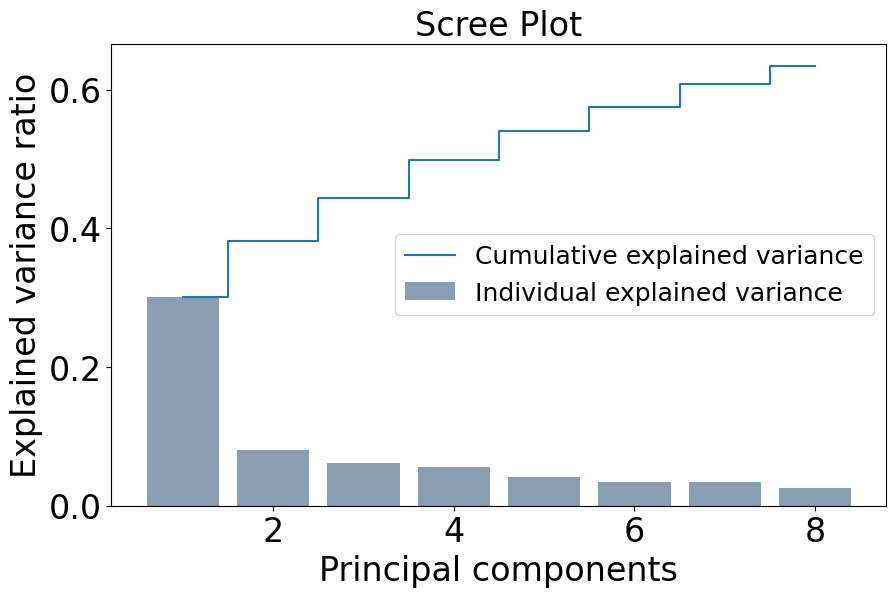

In [34]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance_ratio = np.array(pc.pcaExplainedVarianceRatio(pca))

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance', color='#143F62')  # Change bar color
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio', fontsize=24)
plt.xlabel('Principal components', fontsize=24)
plt.title('Scree Plot', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.legend(fontsize=18)  # Increase legend font size to 24
plt.show()


In [44]:
pc = PCAClassifier()
pca = pc.pcaClassifier(x_train)
print("pcaClassifier Function Executed")
print("PCA Explained Variance Ratio: ",pc.pcaExplainedVarianceRatio(pca))
print("PCA Singular Values: ",pc.pcaSingularValues(pca))

pcaClassifier Function Executed
PCA Explained Variance Ratio:  [0.30051146 0.08066398 0.06201112 0.05583802 0.04082519 0.03428562
 0.03375612 0.02631319]
PCA Singular Values:  [764.43236249 396.04850716 347.25085603 329.5137642  281.75565359
 258.20493188 256.20336191 226.2013986 ]


In [45]:
# Train the PCA model
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=1)
df_train_pca = pca_final.fit_transform(x_train)

In [46]:
# Apply PCA model to the test data
df_test_pca = pca_final.transform(x_test)

In [47]:
# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
LR_PCA_Learner = LogisticRegression()
LR_PCA_Model = LR_PCA_Learner.fit(df_train_pca, y_train)

In [48]:
# Calculate the Area Under the Curve (AUC)
pred_test = LR_PCA_Model.predict_proba(df_test_pca)

In [49]:

y_predict_test = LR_PCA_Model.predict(df_test_pca)

In [50]:
from sklearn.metrics import classification_report
reportspca = classification_report(y_test, y_predict_test)
print(reportspca)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     19015
           1       0.92      1.00      0.96    210985

    accuracy                           0.92    230000
   macro avg       0.46      0.50      0.48    230000
weighted avg       0.84      0.92      0.88    230000



c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [51]:
# set up data read data

datatest = Data()

# seperate target variable and features 

x_data,y_data = datatest.dataAllocation(full_path, 'WA')

# split to train and testing
x_train, x_test, y_train, y_test = datatest.trainSets(x_data,y_data)
# Train the PCA model
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=1)
df_train_pca = pca_final.fit_transform(x_train)
# Apply PCA model to the test data
df_test_pca = pca_final.transform(x_test)
# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
LR_PCA_Learner = LogisticRegression()
LR_PCA_Model = LR_PCA_Learner.fit(df_train_pca, y_train)
# Calculate the Area Under the Curve (AUC)
pred_test = LR_PCA_Model.predict_proba(df_test_pca)

y_predict_test = LR_PCA_Model.predict(df_test_pca)
from sklearn.metrics import classification_report
reportspca = classification_report(y_test, y_predict_test)
print(reportspca)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10355
           1       0.94      1.00      0.97    177484

    accuracy                           0.94    187839
   macro avg       0.47      0.50      0.49    187839
weighted avg       0.89      0.94      0.92    187839



c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [52]:
# set up data read data

datatest = Data()

# seperate target variable and features 

x_data,y_data = datatest.dataAllocation(full_path, 'TX')

# split to train and testing
x_train, x_test, y_train, y_test = datatest.trainSets(x_data,y_data)
# Train the PCA model
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=1)
df_train_pca = pca_final.fit_transform(x_train)
# Apply PCA model to the test data
df_test_pca = pca_final.transform(x_test)
# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
LR_PCA_Learner = LogisticRegression()
LR_PCA_Model = LR_PCA_Learner.fit(df_train_pca, y_train)
# Calculate the Area Under the Curve (AUC)
pred_test = LR_PCA_Model.predict_proba(df_test_pca)

y_predict_test = LR_PCA_Model.predict(df_test_pca)
from sklearn.metrics import classification_report
reportspca = classification_report(y_test, y_predict_test)
print(reportspca)

c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     52444
           1       0.92      1.00      0.96    620608

    accuracy                           0.92    673052
   macro avg       0.46      0.50      0.48    673052
weighted avg       0.85      0.92      0.88    673052



c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Forcessofnature\miniconda3\envs\hmda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Feature selection

In [14]:
df = pd.read_parquet(full_path)
# # Filter columns that start with 'state_code'
# state_code_columns = df.filter(regex='^state_code', axis=1)
#ref state
df = df.drop(['derived_sex_Male','race_ethnicity_White', 'applicant_age_25-34', 'occupancy_type_Principal Residence'], axis=1)

# bring data with state code 
# filter by state_code of interst
# then get dummies for that state
# Drop filtered columns

# 'derived_sex_Male', 'race_ethnicity_White, 'applicant_age_25-34', occupancy_type_Principal Residence
#df = df[df['state_code'] == 'NY']
df = pd.get_dummies(df, columns=['state_code'], drop_first=True)



x_data = df.drop(['application_approved', 'county_code'], axis=1)

bool_columns = x_data.select_dtypes(include='bool').columns
x_data[bool_columns] = x_data[bool_columns].astype(int)

y_data = df['application_approved']

In [15]:
import statsmodels.api as sm
LR2 = sm.GLM(y_data,(sm.add_constant(x_data)), family = sm.families.Binomial())
LR_model2 = LR2.fit()
LR_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     application_approved   No. Observations:              3636300
Model:                              GLM   Df Residuals:                  3636274
Model Family:                  Binomial   Df Model:                           25
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:            -9.2760e+05
Date:                  Sun, 14 Apr 2024   Deviance:                   1.8552e+06
Time:                          17:08:28   Pearson chi2:                 3.72e+06
No. Iterations:                       9   Pseudo R-squ. (CS):            0.02212
Covariance Type:              nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 1.2773      0.054     23.519      0.000       1.171       1.384
income_log                            0.8769      0.005    159.514      0.000       0.866       0.888
loan_amount_log                      -0.2385      0.006    -37.306      0.000      -0.251      -0.226
property_value_log                    0.0418      0.008      5.513      0.000       0.027       0.057
race_ethnicity_African American      -0.8664      0.007   -123.600      0.000      -0.880      -0.853
race_ethnicity_Asian                 -0.4376      0.008    -57.675      0.000      -0.452      -0.423
race_ethnicity_Hispanic or Latino    -0.4824      0.006    -84.525      0.000      -0.494      -0.471
race_ethnicity_Joint                 -0.3027      0.010    -30.561      0.000      -0.322      -0.283
race_ethnicity_Missing               -0.3968      0.009    -45.118      0.000      -0.414      -0.380
race_ethnicity_Native American       -0.4884      0.035    -14.096      0.000      -0.556      -0.421
race_ethnicity_Other                 -0.5344      0.016    -33.449      0.000      -0.566      -0.503
race_ethnicity_Pacific Islander      -0.5815      0.043    -13.543      0.000      -0.666      -0.497
occupancy_type_Investment            -0.4113      0.010    -41.983      0.000      -0.430      -0.392
occupancy_type_Second Residence      -0.5098      0.013    -39.173      0.000      -0.535      -0.484
derived_sex_Female                    0.1235      0.005     22.597      0.000       0.113       0.134
derived_sex_Joint                     0.0261      0.005      5.056      0.000       0.016       0.036
derived_sex_Prefer not to say        -0.0543      0.011     -5.089      0.000      -0.075      -0.033
applicant_age_35-44                  -0.2254      0.005    -42.683      0.000      -0.236      -0.215
applicant_age_45-54                  -0.3712      0.006    -62.425      0.000      -0.383      -0.360
applicant_age_55-64                  -0.3307      0.007    -45.543      0.000      -0.345      -0.316
applicant_age_65-74                  -0.0771      0.011     -7.091      0.000      -0.098      -0.056
applicant_age_<25                    -0.1053      0.009    -11.208      0.000      -0.124      -0.087
applicant_age_>74                    -0.0292      0.021     -1.372      0.170      -0.071       0.012
applicant_age_Prefer not to say       3.4853      0.070     49.522      0.000       3.347       3.623
state_code_TX                         0.1796      0.005     35.541      0.000       0.170       0.189
state_code_WA                         0.4195      0.007     58.645      0.000       0.405       0.433
=====================================================================================================
"